In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [100]:
import statsmodels.api as sm

C:\Users\hashi\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [114]:
import seaborn as sns

## Data Collection
I obtained the data from [Basketball-Reference](https://www.basketball-reference.com/play-index/draft_finder.cgi?request=1&year_min=&year_max=2017&round_min=&round_max=&pick_overall_min=1&pick_overall_max=10&franch_id=&college_id=0&is_active=&is_hof=&pos_is_g=Y&pos_is_gf=Y&pos_is_f=Y&pos_is_fg=Y&pos_is_fc=Y&pos_is_c=Y&pos_is_cf=Y&c1stat=g&c1comp=gt&c1val=100&c2stat=&c2comp=&c2val=&c3stat=&c3comp=&c3val=&c4stat=&c4comp=&c4val=&order_by=ws&order_by_asc=&offset=0). This dataset contains all the players selected in the NBA Draft to make at least **100 NBA** appearances. This was an arbitrary cut-off because I wanted enough of a sample size of games to play in the NBA to compare to college

In [2]:
draft = pd.read_table('nba_draft.txt', sep = ',', header = 1)

In [3]:
draft.head(5)

,Rk,Year,Lg,Rd,Pk,Tm,Player,Age,Pos,Born,...,TRB,AST,STL,BLK,FG%,2P%,3P%,FT%,WS,WS/48
0,1,1969,NBA,1,1,MIL,Kareem Abdul-Jabbar\abdulka01,21.362,C,us,...,11.2,3.6,0.7,2.0,0.559,0.560,0.056,0.721,273.4,.228
1,2,2003,NBA,1,1,CLE,LeBron James\jamesle01,18.182,F-G,us,...,7.4,7.2,1.6,0.8,0.504,0.547,0.344,0.739,219.4,.238
2,3,1984,NBA,1,3,CHI,Michael Jordan\jordami01,21.128,G-F,us,...,6.2,5.3,2.3,0.8,0.497,0.510,0.327,0.835,214.0,.250
3,4,1997,NBA,1,1,SAS,Tim Duncan\duncati01,21.066,F-C,vi,...,10.8,3.0,0.7,2.2,0.506,0.509,0.179,0.696,206.4,.209
4,5,1998,NBA,1,9,MIL,Dirk Nowitzki\nowitdi01,20.010,F,de,...,7.7,2.5,0.8,0.9,0.472,0.497,0.383,0.879,206.1,.196


In [4]:
# Looking at our data
np.shape(draft)

(603, 26)

In [60]:
# Exploring to see columns/variable names
list(draft)

['Rk',
 'Year',
 'Lg',
 'Rd',
 'Pk',
 'Tm',
 'Player',
 'Age',
 'Pos',
 'Born',
 'College',
 'From',
 'To',
 'G',
 'MP',
 'PTS',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'FG%',
 '2P%',
 '3P%',
 'FT%',
 'WS',
 'WS/48']

## Cleaning up the `Players` column

Stripping away the `'\'` and the player id that comes after

In [5]:
draft['Player'] = draft['Player'].map(lambda x:  x.lstrip('\\').rstrip('abcdefghijklmnopqrstuvwxyz0123456789'))

In [6]:
draft['Player'] = draft['Player'].str.strip("\\")

In [7]:
draft['Player'].head(5)

0    Kareem Abdul-Jabbar
1           LeBron James
2         Michael Jordan
3             Tim Duncan
4          Dirk Nowitzki
Name: Player, dtype: object

In [8]:
# Check for missing data. We have 438 data points missing
draft.isnull().sum().sum()

438

In [9]:
# We can drop those rows/observations that contain missing data
draft = draft.dropna()

# We are now left with 399 players. Still a decent amount
np.shape(draft)

(399, 26)

In [10]:
draft.describe()

,Rk,Year,Rd,Pk,Age,From,To,G,MP,PTS,TRB,AST,STL,BLK,FG%,2P%,3P%,FT%,WS
count,399.000000,399.000000,399.0,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000
mean,272.398496,1992.676692,1.0,5.438596,21.159877,1993.716792,2003.370927,678.721805,27.487469,12.807268,5.195489,2.635589,0.904010,0.614536,0.464539,0.480376,0.251739,0.749815,47.242857
std,163.167621,13.173494,0.0,2.855061,1.181281,13.143105,12.311198,308.171541,6.264641,5.052764,2.435898,1.822952,0.410703,0.526379,0.040427,0.034495,0.125899,0.076866,40.657682
min,1.000000,1965.000000,1.0,1.000000,18.276000,1966.000000,1980.000000,103.000000,8.200000,2.800000,1.000000,0.300000,0.200000,0.000000,0.353000,0.377000,0.000000,0.421000,-2.700000
25%,135.000000,1982.000000,1.0,3.000000,20.242000,1983.000000,1993.000000,437.000000,22.750000,8.950000,3.300000,1.300000,0.600000,0.250000,0.438000,0.460500,0.167000,0.706500,17.350000
50%,263.000000,1992.000000,1.0,5.000000,21.251000,1993.000000,2005.000000,687.000000,28.400000,12.300000,4.700000,2.200000,0.800000,0.500000,0.462000,0.479000,0.295000,0.760000,37.400000
75%,401.500000,2004.000000,1.0,8.000000,22.109500,2005.000000,2016.500000,905.500000,32.550000,16.100000,6.600000,3.400000,1.100000,0.800000,0.490000,0.503000,0.346000,0.802000,63.800000
max,603.000000,2016.000000,1.0,10.000000,25.007000,2017.000000,2018.000000,1611.000000,41.100000,30.100000,14.000000,11.200000,2.700000,3.100000,0.641000,0.642000,0.667000,0.905000,273.400000


In [11]:
# Statistics for box score statistics for our players
draft.describe().loc['mean':, 'PTS':'FT%']

,PTS,TRB,AST,STL,BLK,FG%,2P%,3P%,FT%
mean,12.807268,5.195489,2.635589,0.904010,0.614536,0.464539,0.480376,0.251739,0.749815
std,5.052764,2.435898,1.822952,0.410703,0.526379,0.040427,0.034495,0.125899,0.076866
min,2.800000,1.000000,0.300000,0.200000,0.000000,0.353000,0.377000,0.000000,0.421000
25%,8.950000,3.300000,1.300000,0.600000,0.250000,0.438000,0.460500,0.167000,0.706500
50%,12.300000,4.700000,2.200000,0.800000,0.500000,0.462000,0.479000,0.295000,0.760000
75%,16.100000,6.600000,3.400000,1.100000,0.800000,0.490000,0.503000,0.346000,0.802000
max,30.100000,14.000000,11.200000,2.700000,3.100000,0.641000,0.642000,0.667000,0.905000


In [12]:
draft.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 399 entries, 0 to 602
Data columns (total 26 columns):
Rk         399 non-null int64
Year       399 non-null int64
Lg         399 non-null object
Rd         399 non-null int64
Pk         399 non-null int64
Tm         399 non-null object
Player     399 non-null object
Age        399 non-null float64
Pos        399 non-null object
Born       399 non-null object
College    399 non-null object
From       399 non-null int64
To         399 non-null int64
G          399 non-null int64
MP         399 non-null float64
PTS        399 non-null float64
TRB        399 non-null float64
AST        399 non-null float64
STL        399 non-null float64
BLK        399 non-null float64
FG%        399 non-null float64
2P%        399 non-null float64
3P%        399 non-null float64
FT%        399 non-null float64
WS         399 non-null float64
WS/48      399 non-null object
dtypes: float64(12), int64(7), object(7)
memory usage: 84.2+ KB


## College Data
This is the table that I collected for college data from [College-Reference](https://www.sports-reference.com/cbb/play-index/psl_finder.cgi?request=1&match=combined&class_is_fr=Y&class_is_so=Y&class_is_jr=Y&class_is_sr=Y&pos_is_g=Y&pos_is_gf=Y&pos_is_f=Y&pos_is_fg=Y&pos_is_fc=Y&pos_is_c=Y&pos_is_cf=Y&games_type=A&c1stat=g&c1comp=gt&c1val=30&order_by=mp_per_g). <br> 

** NOTE: Since our college data is only from 2009-10 onwards we have to adjust with our draft data.**

In [13]:
draft = draft[draft['Year'] >= 2010]

In [14]:
np.shape(draft)

(58, 26)

We get a very small sample size of 58

In [15]:
draft.head(10)

,Rk,Year,Lg,Rd,Pk,Tm,Player,Age,Pos,Born,...,TRB,AST,STL,BLK,FG%,2P%,3P%,FT%,WS,WS/48
142,143,2012,NBA,1,1,NOH,Anthony Davis,19.114,F-C,us,...,10.3,1.9,1.3,2.4,0.517,0.531,0.309,0.795,62.5,.210
161,162,2012,NBA,1,6,POR,Damian Lillard,21.354,G,us,...,4.1,6.2,0.9,0.3,0.432,0.477,0.368,0.884,58.2,.164
184,185,2010,NBA,1,10,IND,Paul George,20.058,F,us,...,6.2,3.2,1.7,0.4,0.432,0.468,0.376,0.844,53.4,.146
201,202,2011,NBA,1,1,CLE,Kyrie Irving,19.096,G,au,...,3.4,5.5,1.3,0.3,0.462,0.493,0.388,0.875,49.3,.158
203,204,2010,NBA,1,7,DET,Greg Monroe,20.025,C-F,us,...,8.6,2.3,1.1,0.6,0.515,0.516,0.000,0.707,48.6,.137
215,216,2012,NBA,1,9,DET,Andre Drummond,18.327,C,us,...,13.4,1.1,1.3,1.5,0.545,0.547,0.167,0.421,46.4,.158
227,228,2010,NBA,1,1,WAS,John Wall,19.296,G,us,...,4.4,9.2,1.7,0.7,0.432,0.454,0.327,0.786,43.2,.107
228,229,2010,NBA,1,9,UTA,Gordon Hayward,20.098,F-G,us,...,4.2,3.4,1.0,0.4,0.444,0.478,0.368,0.820,43.0,.128
237,238,2010,NBA,1,5,SAC,DeMarcus Cousins,19.320,C-F,us,...,11.0,3.2,1.4,1.2,0.460,0.474,0.338,0.737,41.6,.115
238,239,2010,NBA,1,3,NJN,Derrick Favors,18.349,F-C,us,...,7.2,1.1,0.8,1.3,0.517,0.523,0.202,0.663,41.5,.138


In [73]:
college = pd.read_table('college.txt', sep = ',', header = 1)

In [74]:
# Removing the /playerid in the Player column
college['Player'] = college['Player'].map(lambda x:  x.lstrip('\\').rstrip('-abcdefghijklmnopqrstuvwxyz0123456789'))

In [75]:
college['Player'] = college['Player'].str.strip("\\")

Right now, there are 50 players that are matching out of 58 

In [76]:
sum(draft['Player'].isin(college['Player']) == True)

50

In [95]:
matches = draft['Player'].isin(college['Player'])

In [96]:
matches.iloc[0]

True

For whatever reason, I like to make my life complicated and as a result I made this `for` loop to see which players college data was missing

**NOTE: Not enough data for Kyrie Irving since he only played 11 games in 1 season. **

**NOTE: Nerlens Noel only played 24 games for Kentucky, the college data that I collected is for players that played at least 30 games**


**NOTE: We will stick with 50 players, here is where I [stopped](https://www.sports-reference.com/cbb/play-index/psl_finder.cgi?request=1&match=combined&year_min=2010&year_max=&conf_id=&school_id=&class_is_fr=Y&class_is_so=Y&class_is_jr=Y&class_is_sr=Y&pos_is_g=Y&pos_is_gf=Y&pos_is_fg=Y&pos_is_f=Y&pos_is_fc=Y&pos_is_cf=Y&pos_is_c=Y&games_type=A&qual=&c1stat=g&c1comp=gt&c1val=30&c2stat=&c2comp=&c2val=&c3stat=&c3comp=&c3val=&c4stat=&c4comp=&c4val=&order_by=mp_per_g&order_by_asc=&offset=4700)**

In [67]:
for val in range(len(matches)):
    if matches.iloc[val] == False:
        print(draft['Player'].iloc[val])

Paul George
Kyrie Irving
Karl-Anthony Towns
Nerlens Noel
Wesley Johnson
Frank Kaminsky
Dion Waiters
Thomas Robinson


## Combining the two datasets

Only reduce the datasets to where they match with our `draft` dataset

In [91]:
college = college[college['Player'].isin(draft['Player'])]

In [87]:
draft = draft[draft['Player'].isin(college['Player'])]

## Exploring the two datasets to see if we can merge

In [98]:
list(college)

['Rk',
 'Player',
 'From',
 'To',
 'School',
 'Conf',
 'G',
 'MP',
 'MP.1',
 'FG',
 'FGA',
 '2P',
 '2PA',
 '3P',
 '3PA',
 'FT',
 'FTA',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS']

In [99]:
list(draft)

['Rk',
 'Year',
 'Lg',
 'Rd',
 'Pk',
 'Tm',
 'Player',
 'Age',
 'Pos',
 'Born',
 'College',
 'From',
 'To',
 'G',
 'MP',
 'PTS',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'FG%',
 '2P%',
 '3P%',
 'FT%',
 'WS',
 'WS/48']

In [109]:
# It worked! 
testdf = pd.merge(college, draft, on = "Player")

In [111]:
np.shape(testdf)

(51, 51)

## Creating certain plots

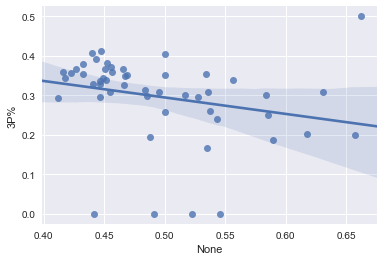

In [127]:
# Using actual data
%matplotlib inline
sns.regplot(x = testdf['FG'] / testdf['FGA'] , 
            y = '3P%', 
            data = testdf)

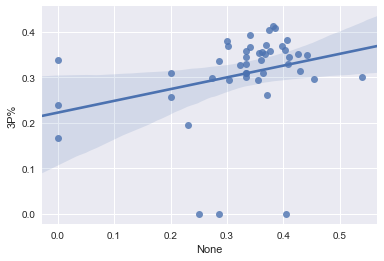

In [126]:
# Using actual data
%matplotlib inline
sns.regplot(x = testdf['3P'] / testdf['3PA'] , 
            y = '3P%', 
            data = testdf)

## Making a multiple linear regression model 

I will be using the college shooting statistics as independent variables and the NBA 3PT shooting as dependent variables. 

Thinking: Let us merge the two columns on `Player`

In [132]:
college_3 = testdf['3P'] / testdf['3PA']
college_2 = testdf['2P'] / testdf['2PA']
college_FT = testdf['FT'] / testdf['FTA']

## Adding new columns to our merged data frame

The statistics that we collected were `2P` made per game and `3P` made per game, they were not %. Therefore, I am manually adding those columns to our dataframe

In [135]:
testdf['3P%(College)'] , testdf['2P%(College)'], testdf['FT%(College)'] = [college_3, college_2, college_FT]

In [142]:
X_mat = testdf['FT%(College)']
y_mat = testdf["3P%"]

In [143]:
model = sm.OLS(y_mat, X_mat).fit()
predictions = model.predict(X_mat)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    3P%   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     456.6
Date:                Tue, 05 Jun 2018   Prob (F-statistic):           8.52e-27
Time:                        15:22:03   Log-Likelihood:                 45.447
No. Observations:                  51   AIC:                            -88.89
Df Residuals:                      50   BIC:                            -86.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
FT%(College)     0.4185      0.020     21.367      0.000       0.379       0.458
==============================================================================
Omnibus:                       26.452   Durbin-Watson:                   1.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.758
Skew:                          -1.536   Prob(JB):                     3.50e-12
Kurtosis:                       6.923   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Results

From this simple linear regression model, we see that a 1% increase in a Players' FT% is associated with a 0.41% increase in their NBA 3P%. In addition, we get a significiant `t`-statistic and `p`-value. The model give us an `R`-squared of 0.901, which means 90% of the variability in our dependent variable (i.e 3P%) can be explained by our model and its one predictor (we do not have a constant). 

## Plotting predicted values with actual

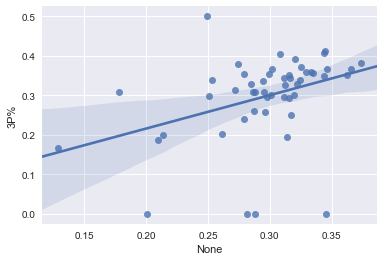

In [144]:
%matplotlib inline
sns.regplot(x = predictions, 
            y = '3P%', 
            data = testdf)

In [146]:
X_mat_two = testdf[['FT%(College)', '2P%(College)']]
y_mat_two = testdf["3P%"]

model_two = sm.OLS(y_mat_two, X_mat_two).fit()
predictions_two = model_two.predict(X_mat_two)

model_two.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    3P%   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     225.4
Date:                Tue, 05 Jun 2018   Prob (F-statistic):           1.94e-25
Time:                        15:49:07   Log-Likelihood:                 45.622
No. Observations:                  51   AIC:                            -87.24
Df Residuals:                      49   BIC:                            -83.38
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
FT%(College)     0.3655      0.094      3.907      0.000       0.177       0.553
2P%(College)     0.0733      0.126      0.580      0.564      -0.181       0.327
==============================================================================
Omnibus:                       26.505   Durbin-Watson:                   1.746
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.497
Skew:                          -1.591   Prob(JB):                     1.79e-11
Kurtosis:                       6.628   Cond. No.                         9.82
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interesting, for our sample `2P%` is not significant in predicting `3P%` shooting. Now let us plot these results. We get a larger standard error as well

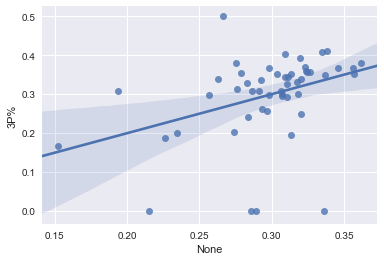

In [147]:
%matplotlib inline
sns.regplot(x = predictions_two, 
            y = '3P%', 
            data = testdf)